<a href="https://colab.research.google.com/github/kevinball02/HUFS-ML-Project/blob/master/pytorch_tutorial_kyh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab에서 노트북을 실행하실 때에는
# https://tutorials.pytorch.kr/beginner/colab 를 참고하세요.
%matplotlib inline
# plt.show()를 바로 볼 수 있게 한다. (몇몇 브라우저에서 안 되는 경우를 방지함)

해당 자료는 PyTorch Tutorial 한글판에서 일부를 가져와,  
직접 실습하며 약간씩 코드를 변형했습니다.

Index  
1. 빠른 시작(Quickstart)
2. 텐서(Tensor)
3. Dataset과 DataLoader

# 1. 빠른 시작(Quickstart)
이번 장에서는 기계 학습의 일반적인 작업들을 위한 API를 통해 실행됩니다.

## 데이터 작업하기
파이토치(PyTorch)에는 [데이터 작업을 위한 기본 요소](https://pytorch.org/docs/stable/data.html) 두가지인
``torch.utils.data.DataLoader`` 와 ``torch.utils.data.Dataset`` 가 있습니다.
``Dataset`` 은 샘플과 정답(label)을 저장하고, ``DataLoader`` 는 ``Dataset`` 을 순회 가능한 객체(iterable)로 감쌉니다.


In [ ]:
# 이곳 변형 (주석 추가)
import torch  # torch 라이브러리를 통째로 불러옵니다.

# 아래는 torch의 여러 클래스 및 함수를 직접 선택하여 호출하는 방식입니다.
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch는 [TorchText](https://pytorch.org/text/stable/index.html), [TorchVision](https://pytorch.org/vision/stable/index.html) 및
[TorchAudio](https://pytorch.org/audio/stable/index.html) 와 같이 도메인 특화 라이브러리를 데이터셋과 함께 제공하고 있습니다.
이 튜토리얼에서는 TorchVision 데이터셋을 사용하도록 하겠습니다.

``torchvision.datasets`` 모듈은 CIFAR, COCO 등과 같은 다양한 실제 비전(vision) 데이터에 대한
``Dataset``\ ([전체 목록은 여기](https://pytorch.org/vision/stable/datasets.html))\ 을 포함하고 있습니다.
이 튜토리얼에서는 FasionMNIST 데이터셋을 사용합니다.
모든 TorchVision ``Dataset`` 은 샘플과 정답을 각각 변경하기 위한 ``transform`` 과 ``target_transform`` 의 두 인자를 포함합니다.



In [ ]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8579485.70it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 133923.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2499597.06it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7156870.07it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# 이곳 변형 (training_data, test_data 출력하기)
print(training_data)
print(test_data)

# 출력값을 보면, 데이터 양이 Train : Test = 6 : 1 의 비율임을 볼 수 있습니다.

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


``Dataset`` 을 ``DataLoader`` 의 인자로 전달합니다. 이는 데이터셋을 순회 가능한 객체(iterable)로 감싸고, 자동화된 배치(batch), 샘플링(sampling),
섞기(shuffle) 및 다중 프로세스로 데이터 불러오기(multiprocess data loading)를 지원합니다. 여기서는 배치 크기(batch size)를 64로 정의합니다.
즉, 데이터로더(dataloader) 객체의 각 요소는 64개의 특징(feature)과 정답(label)을 묶음(batch)으로 반환합니다.



In [ ]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])


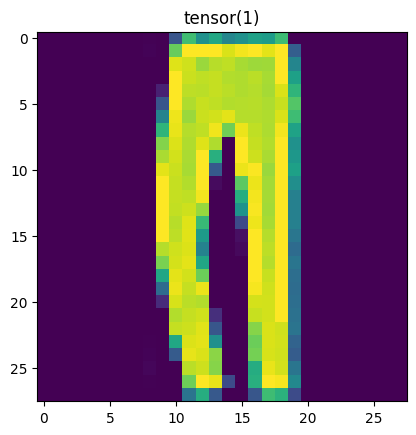

In [ ]:
# 이곳 변형 (test_dataloader의 이미지 데이터 시각화)
print(X.shape) # 이미지 데이터의 구조: 64 samples, 1 channel (gray-scale), 28x28 size in a batch.
print(X[2].shape) # 세번째 sample의 구조: 1 channel, 28x28 size

import matplotlib.pyplot as plt
plt.title(y[2]) # target 값을 제목으로 설정. (cat.1, "Trouser")
plt.imshow(X[2].squeeze().numpy()) # 세번째 sample 시각화

[PyTorch에서 데이터를 불러오는 방법](data_tutorial.html) 을 자세히 알아보세요.




------------------------------------------------------------------------------------------




## 모델 만들기
PyTorch에서 신경망 모델은 [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) 을
상속받는 클래스(class)를 생성하여 정의합니다. ``__init__`` 함수에서 신경망의 계층(layer)들을 정의하고 ``forward`` 함수에서
신경망에 데이터를 어떻게 전달할지 지정합니다. 가능한 경우 GPU 또는 MPS로 신경망을 이동시켜 연산을 가속(accelerate)합니다.



In [ ]:
# 학습에 사용할 CPU나 GPU, MPS 장치를 얻습니다.
# 이곳 변형 (주석 추가)
device = (
    "cuda"
    if torch.cuda.is_available()    # GPU를 사용할 수 있는 경우
    else "mps"
    if torch.backends.mps.is_available()    # GPU는 안 되고, MPS를 사용할 수 있는 경우
    else "cpu"    # 둘 다 안 될 경우
)
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()    # 28x28 행렬을 1x784 으로 변형.
        self.linear_relu_stack = nn.Sequential(    # 일련의 perceptron으로 구성된 신경망을 쌓는다.
            nn.Linear(28*28, 512),    # 28x28 feature를 받고, 512 feature를 반환한다.
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)    # 최종 layer. 분류하려는 class의 개수(10) 만큼 반환한다.
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


[PyTorch에서 신경망을 정의하는 방법](buildmodel_tutorial.html) 을 자세히 알아보세요.




------------------------------------------------------------------------------------------




## 모델 매개변수 최적화하기
모델을 학습하려면 [손실 함수(loss function)](https://pytorch.org/docs/stable/nn.html#loss-functions) 와
[옵티마이저(optimizer)](https://pytorch.org/docs/stable/optim.html) 가 필요합니다.



In [ ]:
loss_fn = nn.CrossEntropyLoss()    # 손실 값을 계산하는 메커니즘.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)    # 최적의 parameter를 찾아가는 메커니즘.

각 학습 단계(training loop)에서 모델은 (배치(batch)로 제공되는) 학습 데이터셋에 대한 예측을 수행하고,
예측 오류를 역전파하여 모델의 매개변수를 조정합니다.



In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:    # 100번의 학습마다 한 번씩 log를 출력해라. # 이곳 변형(주석 추가)
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

모델이 학습하고 있는지를 확인하기 위해 테스트 데이터셋으로 모델의 성능을 확인합니다.



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X) # 이미지 데이터에 대한 예측값 # 이곳 변형 (주석 추가)
            test_loss += loss_fn(pred, y).item() # loss_fn으로 계산한 residual
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            '''
             10개 범주의 각 확률 중 최댓값이 나오는 범주가 실제와 같다면,
             즉 모델이 이미지를 잘 분류했다면, 정답으로 처리해라.
            '''
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

학습 단계는 여러번의 반복 단계 (*에폭(epochs)*) 를 거쳐서 수행됩니다. 각 에폭에서는 모델은 더 나은 예측을 하기 위해  매개변수를 학습합니다.
각 에폭마다 모델의 정확도(accuracy)와 손실(loss)을 출력합니다; 에폭마다 정확도가 증가하고 손실이 감소하는 것을 보려고 합니다.



In [ ]:
epochs = 6 # 이곳 변형 (숫자 변경)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303880  [   64/60000]
loss: 2.290059  [ 6464/60000]
loss: 2.271815  [12864/60000]
loss: 2.272836  [19264/60000]
loss: 2.245250  [25664/60000]
loss: 2.211071  [32064/60000]
loss: 2.221870  [38464/60000]
loss: 2.188442  [44864/60000]
loss: 2.192505  [51264/60000]
loss: 2.153039  [57664/60000]
Test Error: 
 Accuracy: 40.3%, Avg loss: 2.151574 

Epoch 2
-------------------------------
loss: 2.157870  [   64/60000]
loss: 2.153127  [ 6464/60000]
loss: 2.092008  [12864/60000]
loss: 2.120847  [19264/60000]
loss: 2.053924  [25664/60000]
loss: 1.988025  [32064/60000]
loss: 2.028832  [38464/60000]
loss: 1.945014  [44864/60000]
loss: 1.957450  [51264/60000]
loss: 1.882961  [57664/60000]
Test Error: 
 Accuracy: 54.5%, Avg loss: 1.884403 

Epoch 3
-------------------------------
loss: 1.910347  [   64/60000]
loss: 1.892339  [ 6464/60000]
loss: 1.767581  [12864/60000]
loss: 1.822512  [19264/60000]
loss: 1.695066  [25664/60000]
loss: 1.644806  [32064/600

[모델을 학습하는 방법](optimization_tutorial.html) 을 자세히 알아보세요.




------------------------------------------------------------------------------------------




## 모델 저장하기
모델을 저장하는 일반적인 방법은 (모델의 매개변수들을 포함하여) 내부 상태 사전(internal state dictionary)을
직렬화(serialize)하는 것입니다.



In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## 모델 불러오기

모델을 불러오는 과정에는 모델 구조를 다시 만들고 상태 사전을 모델에 불러오는 과정이 포함됩니다.



In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

이제 이 모델을 사용해서 예측을 할 수 있습니다.



In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[2][0], test_data[2][1] # 이곳 변형 (세번째 이미지 데이터, "Trouser")
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Trouser", Actual: "Trouser"


[모델을 저장하고 불러오는 방법](saveloadrun_tutorial.html) 을 자세히 알아보세요.




# 2. 텐서(Tensor)

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다.
PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

텐서는 GPU나 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 [NumPy](https://numpy.org) 의 ndarray와 유사합니다.
실제로 텐서와 NumPy 배열(array)은 종종 동일한 내부(underly) 메모리를 공유할 수 있어 데이터를 복사할 필요가 없습니다. (`bridge-to-np-label` 참고)
텐서는 또한 ([Autograd](autogradqs_tutorial.html)_ 장에서 살펴볼) 자동 미분(automatic differentiation)에 최적화되어 있습니다.
ndarray에 익숙하다면 Tensor API를 바로 사용할 수 있을 것입니다. 아니라면, 아래 내용을 함께 보시죠!


In [ ]:
import torch
import numpy as np

## 텐서(tensor) 초기화

텐서는 여러가지 방법으로 초기화할 수 있습니다. 다음 예를 살펴보세요:

**데이터로부터 직접(directly) 생성하기**

데이터로부터 직접 텐서를 생성할 수 있습니다. 데이터의 자료형(data type)은 자동으로 유추합니다.



In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

# 이곳 변형 (data, x_data 비교)
print(type(data), type(x_data))
data, x_data

<class 'list'> <class 'torch.Tensor'>


([[1, 2], [3, 4]],
 tensor([[1, 2],
         [3, 4]]))

**NumPy 배열로부터 생성하기**

텐서는 NumPy 배열로 생성할 수 있습니다. (그 반대도 가능합니다 - `bridge-to-np-label` 참고)



In [ ]:
np_array = np.array(data)  # list -> ndarray
x_np = torch.from_numpy(np_array)

# 이곳 변형 (자료형 비교)
type(np_array), type(x_np), type(x_np.numpy())    # Tensor -> ndarray

(numpy.ndarray, torch.Tensor, numpy.ndarray)

**다른 텐서로부터 생성하기:**

명시적으로 재정의(override)하지 않는다면, 인자로 주어진 텐서의 속성(모양(shape), 자료형(datatype))을 유지합니다.



In [ ]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

np.ones(x_data.shape), np.ones_like(x_data) # 이곳 변형 (np.ones vs np.ones_like)
# x_data의 shape를 어떻게 (직,간접) 제시하냐의 차이.

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2704, 0.2976],
        [0.8600, 0.5823]]) 



(array([[1., 1.],
        [1., 1.]]),
 array([[1, 1],
        [1, 1]]))

**무작위(random) 또는 상수(constant) 값을 사용하기:**

``shape`` 은 텐서의 차원(dimension)을 나타내는 튜플(tuple)로, 아래 함수들에서는 출력 텐서의 차원을 결정합니다.



In [ ]:
shape = (3,2,) # 이곳 변형 (숫자 변경)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4429, 0.5554],
        [0.2571, 0.4634],
        [0.9338, 0.6736]]) 

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


--------------




## 텐서의 속성(Attribute)

텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치에 저장되는지를 나타냅니다.



In [ ]:
tensor = torch.rand(4,6) # 이곳 변형 (숫자 변경)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([4, 6])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## 텐서 연산(Operation)

전치(transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학 계산, 선형 대수,
임의 샘플링(random sampling) 등, 100가지 이상의 텐서 연산들을
[여기](https://pytorch.org/docs/stable/torch.html)_ 에서 확인할 수 있습니다.

각 연산들은 (일반적으로 CPU보다 빠른) GPU에서 실행할 수 있습니다. Colab을 사용한다면,
Edit > Notebook Settings 에서 GPU를 할당할 수 있습니다.

기본적으로 텐서는 CPU에 생성됩니다. ``.to`` 메소드를 사용하면 (GPU의 가용성(availability)을 확인한 뒤)
GPU로 텐서를 명시적으로 이동할 수 있습니다. 장치들 간에 큰 텐서들을 복사하는 것은 시간과 메모리 측면에서 비용이
많이든다는 것을 기억하세요!



In [ ]:
# GPU가 존재하면 텐서를 이동합니다
print(f"'{torch.cuda.is_available()}' for GPU availability") # 이곳 변형 (GPU 가용성을 텍스트로 출력.)
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

'False' for GPU availability


목록에서 몇몇 연산들을 시도해보세요.
NumPy API에 익숙하다면 Tensor API를 사용하는 것은 식은 죽 먹기라는 것을 알게 되실 겁니다.




**NumPy식의 표준 인덱싱과 슬라이싱:**



In [ ]:
# 이곳 변형 (주석한 부분 모두 추가됨.)
tensor = torch.tensor(np.arange(1,17).reshape(4,4)) # 1~16을 4x4로 배열 (명확한 slicing 예시로 변경)
print(f"tensor: {tensor}")
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
print(f"Main diagonal: {tensor.diag()}") # 주대각선
tensor[:,1] = 0
print(tensor)

tensor: tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
First row: tensor([1, 2, 3, 4])
First column: tensor([ 1,  5,  9, 13])
Last column: tensor([ 4,  8, 12, 16])
Main diagonal: tensor([ 1,  6, 11, 16])
tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12],
        [13,  0, 15, 16]])


**텐서 합치기** ``torch.cat`` 을 사용하여 주어진 차원에 따라 일련의 텐서를 연결할 수 있습니다.
``torch.cat`` 과 미묘하게 다른 또 다른 텐서 결합 연산인
[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_ 도 참고해보세요.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
# 이곳 변형 (주석한 부분 모두 추가됨)
print(f"size of np.stack: {np.stack([tensor, tensor, tensor]).shape}") # 수직(단순 쌓기), 독립적(3차원)
print(f"size of np.vstack: {np.vstack([tensor, tensor, tensor]).shape}") # 수직, 이어 붙이기(2차원)
print(f"size of np.hstack: {np.hstack([tensor, tensor, tensor]).shape}") # 수평, 이어 붙이기(2차원)

tensor([[ 1,  0,  3,  4,  1,  0,  3,  4,  1,  0,  3,  4],
        [ 5,  0,  7,  8,  5,  0,  7,  8,  5,  0,  7,  8],
        [ 9,  0, 11, 12,  9,  0, 11, 12,  9,  0, 11, 12],
        [13,  0, 15, 16, 13,  0, 15, 16, 13,  0, 15, 16]])
size of np.stack: (3, 4, 4)
size of np.vstack: (12, 4)
size of np.hstack: (4, 12)


**산술 연산(Arithmetic operations)**



In [ ]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
# ``tensor.T`` 는 텐서의 전치(transpose)를 반환합니다.
tensor = torch.ones(4,4); tensor[:,1] = 0 # tensor를 다시 수정. (이곳 변형)
# 이전의 tensor를 쓸 경우, entry가 float이 아니므로 rand_like 메소드에서 문제가 발생한다. (이곳 변형)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T) # y1과 y2는 동치 (이곳 변형: 주석)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**단일-요소(single-element) 텐서** 텐서의 모든 값을 하나로 집계(aggregate)하여 요소가 하나인 텐서의 경우,
``item()`` 을 사용하여 Python 숫자 값으로 변환할 수 있습니다:



In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


**바꿔치기(in-place) 연산**
연산 결과를 피연산자(operand)에 저장하는 연산을 바꿔치기 연산이라고 부르며, ``_`` 접미사를 갖습니다.
예를 들어: ``x.copy_(y)`` 나 ``x.t_()`` 는 ``x`` 를 변경합니다.



In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>바꿔치기 연산은 메모리를 일부 절약하지만, 기록(history)이 즉시 삭제되어 도함수(derivative) 계산에 문제가 발생할 수 있습니다.
     따라서, 사용을 권장하지 않습니다.</p></div>



--------------





## NumPy 변환(Bridge)
CPU 상의 텐서와 NumPy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다른 하나도 변경됩니다.



### 텐서를 NumPy 배열로 변환하기



In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
print(type(t), type(n)) # 이곳 변형 (t, n의 dtype 출력)

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
<class 'torch.Tensor'> <class 'numpy.ndarray'>


텐서의 변경 사항이 NumPy 배열에 반영됩니다.



In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy 배열을 텐서로 변환하기



In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

NumPy 배열의 변경 사항이 텐서에 반영됩니다.



In [ ]:
np.add(n, 1, out=n) # 반복 실행할 경우, 계속 1씩 더해집니다. (이곳 변형: 주석)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 3. Dataset과 DataLoader


데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다;
더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다.
PyTorch는 ``torch.utils.data.DataLoader`` 와 ``torch.utils.data.Dataset`` 의 두 가지 데이터 기본 요소를
제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다.
``Dataset`` 은 샘플과 정답(label)을 저장하고, ``DataLoader`` 는 ``Dataset`` 을 샘플에 쉽게 접근할 수 있도록
순회 가능한 객체(iterable)로 감쌉니다.

PyTorch의 도메인 특화 라이브러리들은 (FashionMNIST와 같은) 미리 준비해둔(pre-loaded) 다양한 데이터셋을 제공합니다.
데이터셋은 ``torch.utils.data.Dataset`` 의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있습니다.
이러한 데이터셋은 모델을 만들어보고(prototype) 성능을 측정(benchmark)하는데 사용할 수 있습니다.
여기에서 데이터셋들을 찾아볼 수 있습니다:
[이미지 데이터셋](https://pytorch.org/vision/stable/datasets.html),
[텍스트 데이터셋](https://pytorch.org/text/stable/datasets.html) 및
[오디오 데이터셋](https://pytorch.org/audio/stable/datasets.html)




## 데이터셋 불러오기

`TorchVision` 에서 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 데이터셋을
불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다.
각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.

다음 매개변수들을 사용하여 [FashionMNIST 데이터셋](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) 을 불러옵니다:
 - ``root`` 는 학습/테스트 데이터가 저장되는 경로입니다.
 - ``train`` 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
 - ``download=True`` 는 ``root`` 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
 - ``transform`` 과 ``target_transform`` 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.



In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
# 이곳 변형 (training_data의 클래스 분석)
training_data.classes, training_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

## 데이터셋을 순회하고 시각화하기

``Dataset`` 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: ``training_data[index]``.
``matplotlib`` 을 사용하여 학습 데이터의 일부를 시각화해보겠습니다.



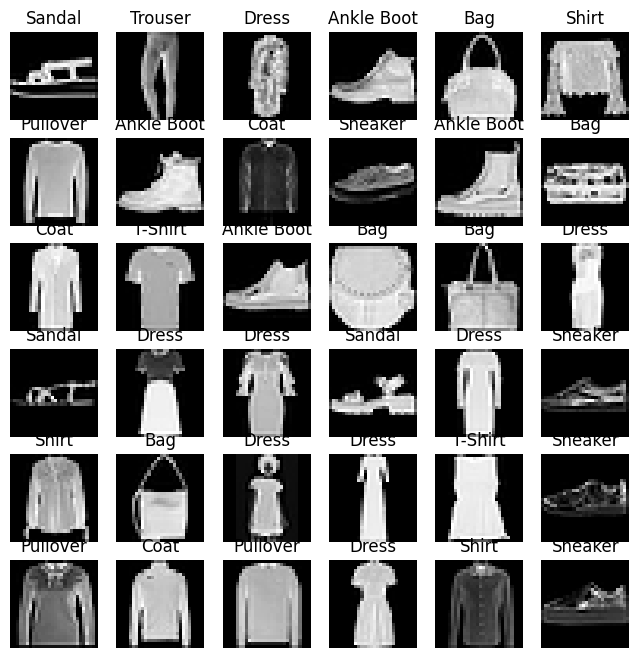

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 6, 6 # 이곳 변형 (숫자 변경)
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# 이곳 변형 (training_data shape 확인)
training_data[0][0].shape, training_data[0][1] # 첫 번째 그림과 그에 해당하는 label

(torch.Size([1, 28, 28]), 9)

------------------------------------------------------------------------------------------




## 파일에서 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: `__init__`, `__len__`, and `__getitem__`.
아래 구현을 살펴보면 FashionMNIST 이미지들은 ``img_dir`` 디렉토리에 저장되고, 정답은 ``annotations_file`` csv 파일에
별도로 저장됩니다.

다음 장에서 각 함수들에서 일어나는 일들을 자세히 살펴보겠습니다.



In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### __init__

__init__ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다.
여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지
변형(transform)을 초기화합니다.

labels.csv 파일은 다음과 같습니다: ::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### __len__

__len__ 함수는 데이터셋의 샘플 개수를 반환합니다.

예:



In [ ]:
def __len__(self):
    return len(self.img_labels)

### __getitem__

__getitem__ 함수는 주어진 인덱스 ``idx`` 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.
인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, ``read_image`` 를 사용하여 이미지를 텐서로 변환하고, ``self.img_labels`` 의 csv 데이터로부터
해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.



In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample

------------------------------------------------------------------------------------------




## DataLoader로 학습용 데이터 준비하기

``Dataset`` 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다.
모델을 학습할 때, 일반적으로 샘플들을 "미니배치(minibatch)"로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고,
Python의 ``multiprocessing`` 을 사용하여 데이터 검색 속도를 높이려고 합니다.

``DataLoader`` 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.



In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## DataLoader를 통해 순회하기(iterate)

``DataLoader`` 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다.
아래의 각 순회(iteration)는 (각각 ``batch_size=64`` 의 특징(feature)과 정답(label)을 포함하는) ``train_features`` 와
``train_labels`` 의 묶음(batch)을 반환합니다. ``shuffle=True`` 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다.
(데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)
를 살펴보세요.)



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


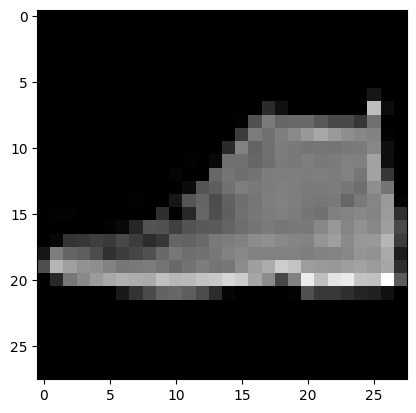

Label: 9


In [ ]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
# next, iter 함수로, 반복 실행시 다음 사진으로 계속 넘어간다. (이곳 변형: 주석)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------------------------




## 더 읽어보기
- [torch.utils.data API](https://pytorch.org/docs/stable/data.html)

